# Decision tree  
Decision Trees are another popular class of ML algorithms. We will use the dataset about 
forged banknotes that was also used in Exercise 1.

a) Fetch the dataset from OpenML and split-up the data into a training and a test set 
(test ratio of 0.2).

b) Train a Decision Tree Classifier with max_depth=2 and visualize the resulting tree. 
Explain the visualization and how this tree can be used for predictions.

c) Use a grid search to find the best parameter settings for the classifier. Search in depth 
values between 2 and 15, test both criteria (entropy and gini) for measuring the split 
quality, and test both criteria to select the split (best and random). 

d) Decision Trees can also be used for regression problems. For the sake of simplicity, we 
simply use the original numeric target values of the dataset as numeric regression 
targets. Apply some gaussian noise (mean of 0 and standard deviation of 0.2) to make 
the target values more realistic.

e) Repeat the steps from c) to find a well performing predictor. Rate its quality. Please 
note that you have to search through different parameter values than in c) since the 
regressor expects different values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score
from sklearn import svm, tree

In [2]:
# a) load data
data = sklearn.datasets.fetch_openml(name='banknote-authentication')
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.DataFrame(data=data.target, columns=data.target_names)
df = pd.concat([X, y], axis=1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

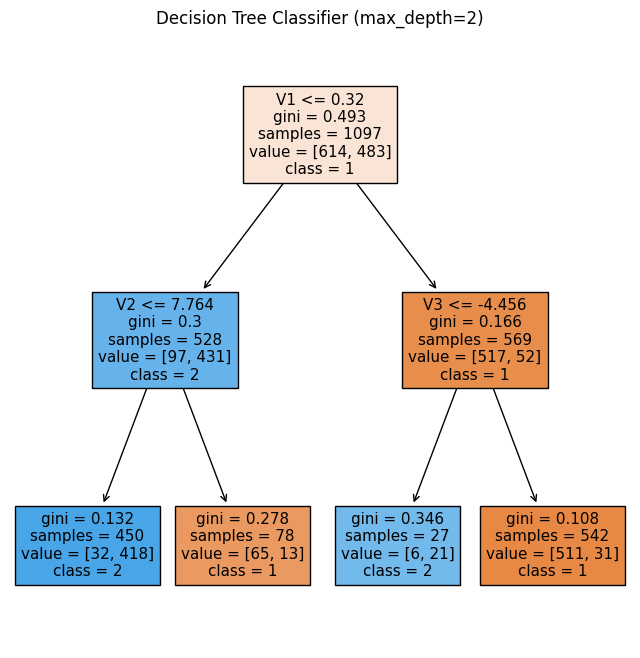

In [5]:
# b) Train a Decision Tree Classifier with max_depth=2 and visualize the resulting tree. Explain the visualization and how this tree can be used for predictions.
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(8, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Decision Tree Classifier (max_depth=2)")
plt.show()


In [6]:
# c) Use a grid search to find the best parameter settings for the classifier

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'max_depth': range(2, 16),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}, 0.9835948526359486)

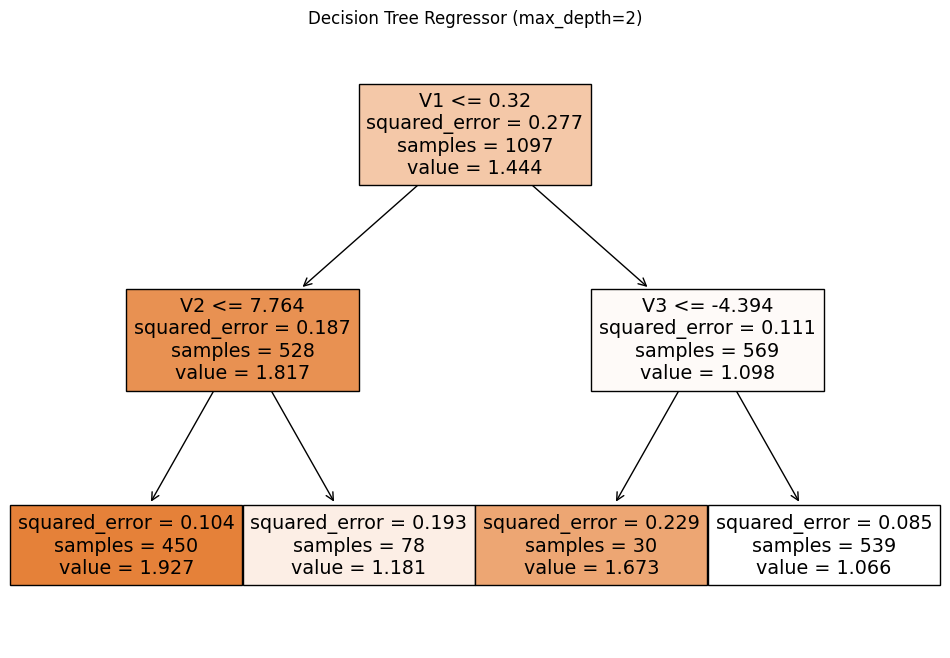

In [10]:
# d) Decision tree for regression
from sklearn.tree import DecisionTreeRegressor

# Convert target to numeric and add Gaussian noise
y_train_numeric = y_train.astype(float) + np.random.normal(0, 0.2, y_train.shape)
y_test_numeric = y_test.astype(float) + np.random.normal(0, 0.2, y_test.shape)

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
regressor.fit(X_train, y_train_numeric)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree Regressor (max_depth=2)")
plt.show()



In [11]:
# e) Grid search for the regressor
param_grid_regressor = {
    'max_depth': range(2, 16),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random']
}

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Perform grid search for the regressor
grid_search_regressor = GridSearchCV(regressor, param_grid_regressor, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_regressor.fit(X_train, y_train_numeric)

# Display the best parameters and score
best_params_regressor = grid_search_regressor.best_params_
best_score_regressor = grid_search_regressor.best_score_

best_params_regressor, best_score_regressor


({'criterion': 'squared_error', 'max_depth': 6, 'splitter': 'best'},
 -0.06257819265660444)